# **Filip's Visualization and Reflection**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# colab-specific file access
# comment out if not on colab:

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/418ProjectProgressReport

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/418ProjectProgressReport


**Read in the data**

In [4]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

**The main goal of our project is to explore what factors are linked to obesity. The goal of our visualizations is to present these links in a format that should present clear trends and be simple to see.**

# **Visualization 1: Income and BMI**



The first relationship that we would like to visualize, is the link between the income of an individual and their BMI. The hypothesis we had going into this was that a higher income would result in a lower BMI on average. This is because a higher income typically results in more access to healthy food as well as better medical access, likely reducing the chances of medical obesity.

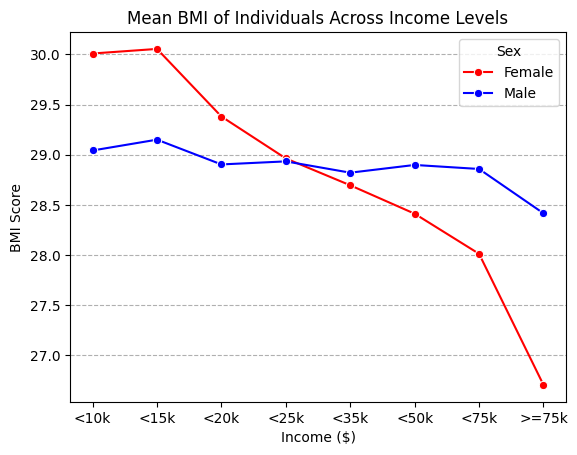

In [5]:
#create a lineplot using data from the dataframe, with income on the x axis and BMI on the y axis
sns.lineplot(data = df, marker = 'o', x = 'Income', y = 'BMI', hue = 'Sex', estimator = np.mean, errorbar = None, palette=['red', 'blue'])
plt.grid(linestyle = '--', axis = 'y', which = 'major')

#create a title and labels
plt.title("Mean BMI of Individuals Across Income Levels")
plt.ylabel("BMI Score")
plt.xlabel("Income ($)")

#create a legend for the graph
plt.legend(title = 'Sex', loc = 'upper right', bbox_to_anchor=(1, 1), labels = ["Female", "Male"])

#rename the income levels to meaningful labels
plt.xticks([1,2,3,4,5,6,7,8], ['<10k', '<15k', '<20k', '<25k', '<35k', '<50k', '<75k','>=75k'])

plt.show()

This was in interesting hypothesis to test, as the income of an individual seemingly has a positive relationship with BMI. The higher an individual's income, the lower their BMI on average. While this is true accross both sexes, it seemed to have a bigger impact on women. The impact on men is also apparent, with a clear downward trajectory, but with a much lower rate of change.

In summary the results of this graph show a relationship between income and obesity across both men and women in our test data.

# **Visualization 2: Exercise and BMI**

The second relationship that we would like to visualize is the link between exercise and BMI across age ranges. The hypothesis that we are going to be testing is that exercising is likely to lead to a decrease in an individuals BMI. This is because exercising burns calories, and burning calories leads to losing weight. Therefore we expect that exercising lowers an individual's BMI and decreases the odds of them being obese.

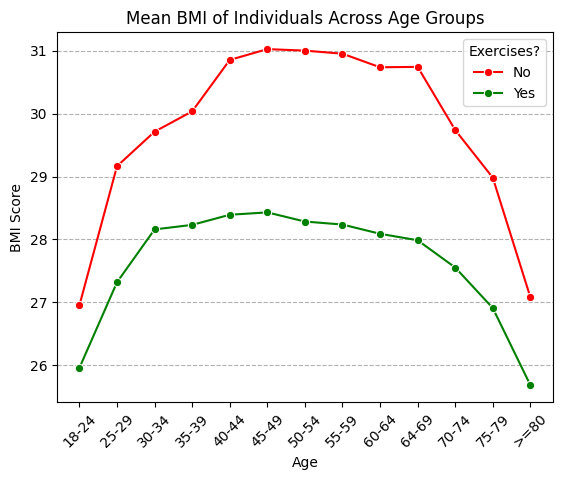

In [6]:
#get rid of people who didnt provide their age
df = df[df['Age'] != 14.0]

#create a lineplot using data from the dataframe, with income on the x axis and BMI on the y axis
axs = sns.lineplot(data = df, marker = 'o', x = 'Age', y = 'BMI', hue = 'PhysActivity', estimator = np.mean, errorbar = None, palette=['red', 'green'])
plt.grid(linestyle = '--', axis = 'y', which = 'major')

#create a title and labels
plt.title("Mean BMI of Individuals Across Age Groups")
plt.ylabel("BMI Score")
plt.xlabel("Age")

#create a legend for the graph
plt.legend(title = 'Exercises?', loc = 'upper right', bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

#rename the age values to meaningful labels
plt.xticks([1,2,3,4,5,6,7,8, 9, 10, 11, 12, 13], ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-64', '64-69', '70-74', '75-79', '>=80'])
#rotate the x labels
axs.tick_params(axis='x', rotation=45)

plt.show()

This was an interesting hypothesis to test, as it not only confirmed our hypothesis, but also showed that it is true accross all age ranges. We also found it interesting that the graph seems to show a similar curve across both groups, showing trends in BMI across age ranges regardless of exercise habits. It can also be said that regardless of exercise, young and old people had lower BMI scores that middle aged and upper middle aged people.

In summary, the results of this graph shows a relationship between obesity and exercise habits across age groups.

# **Visualization 3: Eating Habits and BMI**

The third relationship that we would like to visualize is the link between
eating healthy and BMI among individuals in our data set. The
hypothesis that we are going to be testing is that eating healthy will
lead to a lower BMI across all individuals. This is due to the fact that
the variables we tested, fruits and veggies, are low in calories and
tend to be full of healthy nutrients. We felt that those who did not have
these groups present in their diets are more likely to be substituting
them with less healthy, more calorie dense alternatives.

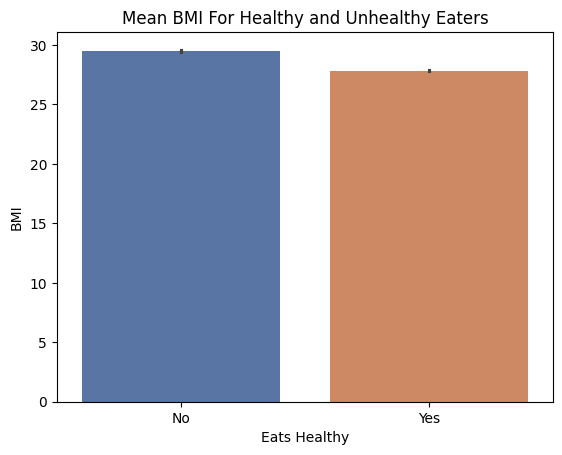

In [9]:
#3rd visualization

#those who smoke and drink
smokers_drinkers = df[(df['Fruits'] == 0) & (df['Veggies'] == 0)]

#those who dont smoke or drink
non_smokers_drinkers = df[(df['Fruits'] == 1) & (df['Veggies'] == 1)]

smokers_drinkers.loc[:, 'unhealthy'] = '1'
non_smokers_drinkers.loc[:, 'unhealthy'] = '0'

all_individuals = pd.concat([smokers_drinkers, non_smokers_drinkers])

axs = sns.barplot(x = 'unhealthy', y = 'BMI', hue = 'unhealthy', data = all_individuals, palette = 'deep')
plt.xlabel('Eats Healthy')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Mean BMI For Healthy and Unhealthy Eaters')
pd.options.mode.chained_assignment = None


This was an interesting hypothesis to test, as the results of the
visualization confirm our hypothesis, but not as much as expected.
The difference in average BMIs was only a couple scores, less than
we anticipated due to the fact that the mean of the group that doesn’t
eat healthy is under the obesity range.

# **Reflection: What are your initial insights?**

While working on this project, we have found out several things about our data. First of all, we have found that some links we expected to be present were not, while on the other hand we discovered some links that we did not expect to be present. Most of the big insights which we have gained have to do with the links connecting individuals to obesity. Our data contains BMI scores for each individual, which we can then convert to an obesity score based on if the BMI is above 30 or not. We have found that the expected links are there, for example, exercise being beneficial to keep an individuals BMI down and a higher income leading to lower BMIs on average. But some of the links that we expected were not so clear, for example the impacts on eating fruits and vegetables were not as large as we had expected. This shows that we cannot just depend on individual categories for our program. In order to get clearer results, we have to think outside the box and not just go for what we believe to be obvious.
